# packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.spatial import distance
import warnings
warnings.filterwarnings("ignore")

# Data

In [148]:
#dummy data to test clustering
X, _ = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Hierarchy cluster in packages

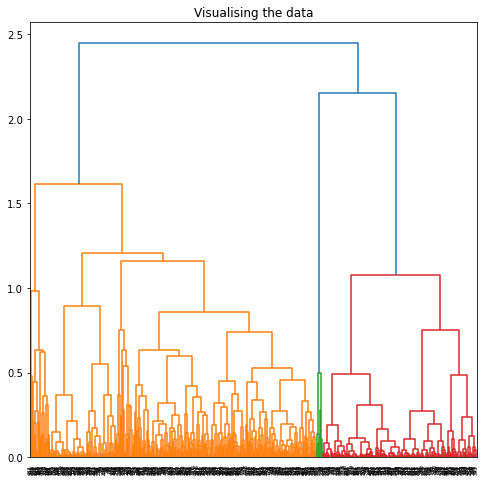

In [149]:
#Visualizing the working of the Dendograms
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram(shc.linkage(X, method ='average',metric='euclidean'),orientation='top')

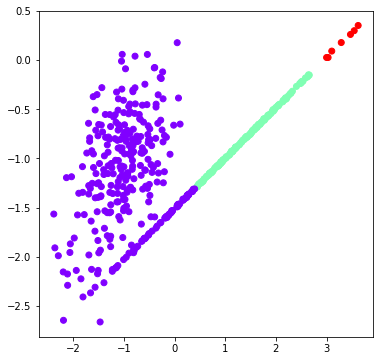

In [150]:
ac = AgglomerativeClustering(n_clusters = 3,linkage='average')
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0], X[:,1], c = ac.fit_predict(X), cmap ='rainbow')
plt.show()

# Implementation

In [151]:
#Here I'm using : linkage=average & metric=euclidean
class Hierarchy:
    def __init__ (self,n_clusters):
        self.k=n_clusters
    
    def get_min_index(self,mat,n):
        min_value=np.inf
        for i in range(n):
            for j in range(n):
                if j<i and mat[i,j] != 0:
                    if mat[i,j] <min_value:
                        min_value=mat[i,j]
                        min_i=i
                        min_j=j
                        
        return np.array([min_i,min_j])
    
    def fit(self,X):
        distance_mat=distance.cdist(X, X, 'euclidean') #size -> m*m
        dissimilarity_mat=distance_mat
        self.idx=np.zeros(X.shape[0])
        m_clusters=X.shape[0]
        # loop until there is only k clusters
        while m_clusters !=self.k:
           # print(self.idx)
            #print("###########################")
            # fuse the two less disimilar clusters
            min_index=self.get_min_index(dissimilarity_mat,X.shape[0])
            
            #first point is already in a cluster
            if self.idx[min_index[0]] !=0: 
                self.idx[np.where(self.idx==self.idx[min_index[0]])]=m_clusters
                if self.idx[min_index[1]] !=0 :
                    self.idx[np.where(self.idx==self.idx[min_index[1]])]=m_clusters
                else:
                    self.idx[min_index[1]]=m_clusters
            # second point is already in a cluster
            elif self.idx[min_index[1]] !=0 :
                self.idx[np.where(self.idx==self.idx[min_index[1]])]=m_clusters
                if self.idx[min_index[0]] !=0 :
                    self.idx[np.where(self.idx==self.idx[min_index[0]])]=m_clusters
                else:
                    self.idx[min_index[0]]=m_clusters
            else :
                #they don't belong to any cluster 
                self.idx[min_index[0]]=m_clusters
                self.idx[min_index[1]]=m_clusters  
                
            # replace the  point wuth the centroid and ignore the other
            mean=np.mean(X[np.where(self.idx==m_clusters)],axis=0)
            X[np.where(self.idx==m_clusters),:]=mean
            #dissimilarity matrix
            dissimilarity_mat=distance.cdist(X, X, 'euclidean')
            # next cluster
            m_clusters-=1
          
    
    def predict(self):
        return self.idx
            

In [154]:
hc=Hierarchy(3)
hc.fit(X.copy())
idx=hc.predict()

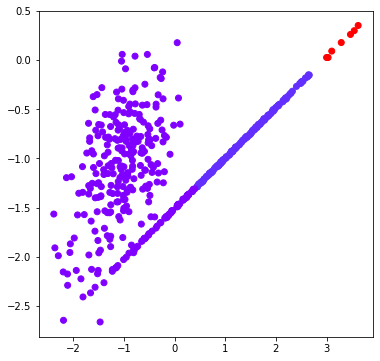

In [155]:
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0], X[:,1], c = idx, cmap ='rainbow')
plt.show()